<a href="https://colab.research.google.com/github/rohanguptha/INFO5731/blob/master/bompally_Assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

In this assignment, you will try to gather information from open data via API and visualize them.

We will use the API from wikipedia as an example.

Please go to [this web page](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews), to learn how to get Pageviews of a certain wikipedia page.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-202134.png)

As you can see here, to get a pageview count timeseries of en.wikipedia's article "[Albert Enstein](https://en.wikipedia.org/wiki/Albert_Einstein)" for the month of October 2015, you can use the following url with a "GET" method.

[https://wikimedia.org/api/rest\_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Albert\_Einstein/daily/2015100100/2015103100](https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Albert_Einstein/daily/2015100100/2015103100)

Your task, is to get Pageviews count timeseries of en.wikipedia's article "[University of North Texas](https://en.wikipedia.org/wiki/University_of_North_Texas)" for the month of January 2019.


![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-210502.png)

Please answer the following questions by putting your code in the corresponding chunks. You can create new code or text chunks if necessary.



**Question 1. (20 points)** Make the corresponding url to gather the required data, and save it into a variable called 'url'.



In [0]:
url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/University_of_North_Texas/daily/2019010100/2019013100'

**Question 2. (20 points)** Call the API by using the url you created in Question 1, and print out the JSON data.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-196474.png)



In [0]:
import requests
import json
response = requests.get(url)
data = response.json()
data

{'items': [{'access': 'all-access',
   'agent': 'all-agents',
   'article': 'University_of_North_Texas',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2019010100',
   'views': 732},
  {'access': 'all-access',
   'agent': 'all-agents',
   'article': 'University_of_North_Texas',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2019010200',
   'views': 834},
  {'access': 'all-access',
   'agent': 'all-agents',
   'article': 'University_of_North_Texas',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2019010300',
   'views': 821},
  {'access': 'all-access',
   'agent': 'all-agents',
   'article': 'University_of_North_Texas',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2019010400',
   'views': 719},
  {'access': 'all-access',
   'agent': 'all-agents',
   'article': 'University_of_North_Texas',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2019010500',
   '

**Question 3. (20 points)** Load the JSON data into Pandas Dataframe, and show the first five rows.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-214261.png)



In [0]:
import pandas as pd

for k, v in data.items():
    new_dict = v
    
result = pd.DataFrame(new_dict)
result.head()

,access,agent,article,granularity,project,timestamp,views
0,all-access,all-agents,University_of_North_Texas,daily,en.wikipedia,2019010100,732
1,all-access,all-agents,University_of_North_Texas,daily,en.wikipedia,2019010200,834
2,all-access,all-agents,University_of_North_Texas,daily,en.wikipedia,2019010300,821
3,all-access,all-agents,University_of_North_Texas,daily,en.wikipedia,2019010400,719
4,all-access,all-agents,University_of_North_Texas,daily,en.wikipedia,2019010500,672


**Question 4. (20 points)** Figure out the max and min views and corresponding date.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-195410.png)

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-197160.png)



In [0]:
df = result[['timestamp', 'views']]
print(df.loc[result['views'].idxmax()])
print(df.loc[result['views'].idxmin()])

timestamp    2019010200
views               834
Name: 1, dtype: object
timestamp    2019012700
views               412
Name: 26, dtype: object


**Question 5. (20 points)** Plot line chart of Pageviews for the whole month.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-197005.png)


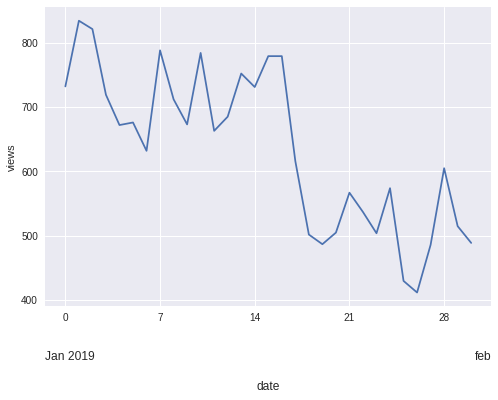

In [0]:
import matplotlib.pyplot as plt
import numpy as np
result.views.plot()
plt.ylabel('views')
plt.title('Jan 2019', loc='left', y = -0.2)
plt.title('feb', loc='right', y = -0.2)
plt.title('date', y = -0.3)
plt.xticks(np.arange(0, 31, step = 7))
plt.show()